## Data Sourcing
Analysing data set from: https://www.kaggle.com/datasets/utpaulsarker/depression-detection-data-set<br>
About Dataset: <br>- .The data set consists o f2e number of features which are directly or indirectly connected with depressio.n <br
- Ddatae collected from face-to-face questionnaires, google forms online, and a paper with a list of questins. <br>.


## Load the Dataset

In [35]:
import pandas as pd
df = pd.read_csv('Final_File_Data.csv')

# Display the dimension of the dataset
print("Dimension of dataset:", df.shape)
df.info()

Dimension of dataset: (1000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Time                                  1000 non-null   object 
 1   Age                                   1000 non-null   float64
 2   Gender                                1000 non-null   object 
 3   Profession                            1000 non-null   object 
 4   MaritalStatus                         1000 non-null   object 
 5   SatisfiedLife                         998 non-null    object 
 6   DroppedActivities                     999 non-null    object 
 7   FeelLifeEmpty                         993 non-null    object 
 8   Bored                                 1000 non-null   object 
 9   FeelHelpless                          997 non-null    object 
 10  AfraidBadHappening                    997 non-null  

## Data Manipulation

## Data Cleaning

In [36]:
print('unique values of marital status: ',df['MaritalStatus'].unique())

# handling mistakes in values
df['MaritalStatus'] = df['MaritalStatus'].replace('Devorced', 'Divorced')


unique values of marital status:  ['Single' 'Married' 'Divorced' 'Devorced']


## Handling missing value
The number of missing values is relatively small compared to the total size of the dataset. 
We simply drop the rows with missing values. 

In [37]:
# Check for Missing Values: Check for missing values in the dataset and handle them accordingly.
print ("\nNumber of missed values in each column:\n", df.isnull().sum())
print ("\nThe percentage of missing values is ",df.isnull().sum().sum()*100/ df.shape[0])

df.dropna(inplace=True)


Number of missed values in each column:
 Time                                    0
Age                                     0
Gender                                  0
Profession                              0
MaritalStatus                           0
SatisfiedLife                           2
DroppedActivities                       1
FeelLifeEmpty                           7
Bored                                   0
FeelHelpless                            3
AfraidBadHappening                      3
HopefulAboutFuture                      1
SpendTimeHappily                        3
FeelEnergy                              0
PreferStayHome                          0
AvoidingSocialGatherings                1
MemoryLoss                              1
ConsiderWorthless                       3
CryMostOfTheTime                        3
SleepWell                               1
FeelingReduceAppetiteAndLosingWeight    1
SituationHopeless                       4
PeopleBetterThanYou               

## Data Deduplication

In [38]:
print("Number of duplicated rows :", df.duplicated().sum())
df.drop_duplicates(inplace=True)    # remove duplicates from a Pandas DataFrame?
print("Dimension of data:", df.shape)
print(df.columns)
df.head()

Number of duplicated rows : 7
Dimension of data: (965, 26)
Index(['Time', 'Age', 'Gender', 'Profession', 'MaritalStatus', 'SatisfiedLife',
       'DroppedActivities', 'FeelLifeEmpty', 'Bored', 'FeelHelpless',
       'AfraidBadHappening', 'HopefulAboutFuture', 'SpendTimeHappily',
       'FeelEnergy', 'PreferStayHome', 'AvoidingSocialGatherings',
       'MemoryLoss', 'ConsiderWorthless', 'CryMostOfTheTime', 'SleepWell',
       'FeelingReduceAppetiteAndLosingWeight', 'SituationHopeless',
       'PeopleBetterThanYou', 'FeelBadAndGuilty', 'OthersWouldBetterYouDied',
       'Result'],
      dtype='object')


,Time,Age,Gender,Profession,MaritalStatus,SatisfiedLife,DroppedActivities,FeelLifeEmpty,Bored,FeelHelpless,...,MemoryLoss,ConsiderWorthless,CryMostOfTheTime,SleepWell,FeelingReduceAppetiteAndLosingWeight,SituationHopeless,PeopleBetterThanYou,FeelBadAndGuilty,OthersWouldBetterYouDied,Result
0,11:53:00 PM,23.0,Male,Student,Single,No,No,No,No,No,...,No,No,No,Sometimes,No,No,No,Sometimes,No,No
1,11:53:00 PM,23.0,Male,Student,Single,No,No,Yes,Yes,No,...,No,No,No,Most of The Time,No,No,Yes,Not at All,No,No
2,11:57:00 PM,24.0,Male,Student,Single,No,Yes,Yes,Yes,Yes,...,Yes,No,No,Sometimes,No,Yes,Yes,Sometimes,No,Yes
3,10:29:00 AM,23.0,Male,Student,Single,No,Yes,Yes,No,Yes,...,Yes,No,No,Sometimes,No,Yes,No,Sometimes,Yes,Yes
4,10:29:00 AM,23.0,Male,Student,Single,Yes,Yes,Yes,Yes,Yes,...,No,Yes,No,Sometimes,Yes,Yes,No,Not at All,No,Yes


## Data Transformation

In [40]:
df['Result'] = df['Result'].replace('No', 'NoDepressed')
df['Result'] = df['Result'].replace('Yes', 'Depressed')

# ----------------------------------------- Export Datasets
df.to_excel('df_categirical.xlsx', index=False)

## Convert Data Types

In [41]:
def convert_categorical_to_numerical(data):
    """    Converts categorical columns to numerical values in the DataFrame.
    """
    df = data.copy()
    for column in df.select_dtypes(include=['object']):
        df[column + '_'], _ = pd.factorize(df[column])
    df.drop(columns=df.select_dtypes(include=['object']).columns, inplace=True)
    
    return df

# ----------------------------------------- Call the function to convert categorical columns to numerical values
df_numerical = convert_categorical_to_numerical(df)

# ----------------------------------------- Export Datasets
df_numerical.to_excel('df_numerical.xlsx', index=False)


Gender:        0=Male 1=Female <br>
Profession:    0=Student<br>
Marital:       0=Single<br>
Result:        0=No 1=Yes<br>

## Analysis

In [42]:
#------------------------------------------- Generating data set for Males and Females based on their professions
males = df[(df['Gender'] == 'Male')]
male_students = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Student')]
male_employees = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Employee')]
male_others = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Others')]

females = df[(df['Gender'] == 'Female')]
female_students = df[(df['Gender'] == 'Female') & (df['Profession'] == 'Student')]
female_employees = df[(df['Gender'] == 'Female') & (df['Profession'] == 'Employee')]
female_others = df[(df['Gender'] == 'Female') & (df['Profession'] == 'Others')]

# ------------------------------------------Count the number of rows in the filtered dataset
print(f'Number of Male participants = {males.shape[0]}, {round(male_students.shape[0]/males.shape[0] *100 ,2)}% of males are students , {round(male_employees.shape[0]/males.shape[0] *100 ,2)}% of males are employees, {round(male_others.shape[0]/males.shape[0] *100 ,2)}% are others.')
print(f'Number of Female participants = {females.shape[0]}, {round(female_students.shape[0]/females.shape[0] *100 ,2)}% of females are students , {round(female_employees.shape[0]/females.shape[0] *100 ,2)}% are employees, {round(female_others.shape[0]/females.shape[0] *100 ,2)}% are others')
print(f'{male_students.shape[0]} of males are students , {male_employees.shape[0]}% of males are employees, {male_others.shape[0]}% are others.')
print(f' {female_students.shape[0]}% of females are students , {female_employees.shape[0]}% are employees, {female_others.shape[0]}% are others')
print('unique values of depression status: ',df['Result'].unique())
print('count of each status:', df['Result'].value_counts(dropna=False))



#------------------------------------------- Generating data set for Males and Females based on their depression status and professions
males_depressed = males[(males['Result'] == 'Depressed')]
males_no_depressed = males[(males['Result'] == 'NoDepressed')]
males_depressed_students = males_depressed[(males_depressed['Profession'] == 'Student')]
males_depressed_employees = males_depressed[(males_depressed['Profession'] == 'Employee')]
males_depressed_others = males_depressed[(males_depressed['Profession'] == 'Others')]

females_depressed = females[(females['Result'] == 'Depressed')]
females_no_depressed = females[(females['Result'] == 'NoDepressed')]
females_depressed_students = females_depressed[(females_depressed['Profession'] == 'Student')]
females_depressed_employees = females_depressed[(females_depressed['Profession'] == 'Employee')]
females_depressed_others = females_depressed[(females_depressed['Profession'] == 'Others')]

males_no_depressed_students = males_no_depressed[(males_no_depressed['Profession'] == 'Student')]
males_no_depressed_employees = males_no_depressed[(males_no_depressed['Profession'] == 'Employee')]
males_no_depressed_others = males_no_depressed[(males_no_depressed['Profession'] == 'Others')]

females_no_depressed_students = females_no_depressed[(females_no_depressed['Profession'] == 'Student')]
females_no_depressed_employees = females_no_depressed[(females_no_depressed['Profession'] == 'Employee')]
females_no_depressed_others = females_no_depressed[(females_no_depressed['Profession'] == 'Others')]

# ------------------------------------------Count the number of rows in the filtered dataset
print(f"{round(males_depressed.shape[0]/males.shape[0]*100 ,2)} % of males are depressed.")
print(f"{round(females_depressed.shape[0]/females.shape[0]*100 ,2)} % of females are depressed")
print(f'{round(males_depressed_students.shape[0]/males_depressed.shape[0] *100 ,2)}% of depressed males are students , {round(males_depressed_employees.shape[0]/males_depressed.shape[0] *100 ,2)}% of depressed males are employees, {round(males_depressed_others.shape[0]/males_depressed.shape[0] *100 ,2)}%  are others.')
print(f' {round(females_depressed_students.shape[0]/females_depressed.shape[0] *100 ,2)}%  of depressed females are students , {round(females_depressed_employees.shape[0]/females_depressed.shape[0] *100 ,2)}% of depressed females are employees, {females_depressed_others.shape[0]/females_depressed.shape[0] *100}% % are others')

print(f"{round(males_no_depressed.shape[0]/males.shape[0]*100 ,2)} % of males are not depressed.")
print(f"{round(females_no_depressed.shape[0]/females.shape[0]*100 ,2)} % of females are not depressed")
print(f'{round(males_no_depressed_students.shape[0]/males_no_depressed.shape[0] *100 ,2)}% of no depressed males are students , {round(males_no_depressed_employees.shape[0]/males_no_depressed.shape[0] *100 ,2)}% of no depressed males are employees, {round(males_no_depressed_others.shape[0]/males_no_depressed.shape[0] *100 ,2)}%  are others.')
print(f' {round(females_no_depressed_students.shape[0]/females_no_depressed.shape[0] *100 ,2)}%  of no depressed females are students , {round(females_no_depressed_employees.shape[0]/females_no_depressed.shape[0] *100 ,2)}% of no depressed females are employees, {round(females_no_depressed_others.shape[0]/females_no_depressed.shape[0] *100,2)}% % are others')

# ----------------------------------------- Export Datasets
males.to_excel('males.xlsx', index=False)
females.to_excel('females.xlsx', index=False)


Number of Male participants = 566, 75.27% of males are students , 15.9% of males are employees, 8.83% are others.
Number of Female participants = 399, 80.45% of females are students , 13.28% are employees, 6.27% are others
426 of males are students , 90% of males are employees, 50% are others.
 321% of females are students , 53% are employees, 25% are others
unique values of depression status:  ['NoDepressed' 'Depressed']
count of each status: Result
NoDepressed    563
Depressed      402
Name: count, dtype: int64
36.93 % of males are depressed.
48.37 % of females are depressed
70.33% of depressed males are students , 17.7% of depressed males are employees, 11.96%  are others.
 81.35%  of depressed females are students , 12.95% of depressed females are employees, 5.699481865284974% % are others
63.07 % of males are not depressed.
51.63 % of females are not depressed
78.15% of no depressed males are students , 14.85% of no depressed males are employees, 7.0%  are others.
 79.61%  of no d

In [43]:
# ------------------------------------- Mean Age of participants
print("The mean age of participants: ",round(df['Age'].mean() ,2))

The mean age of participants:  22.57


                                        Age  Time_  Gender_  Profession_  \
Age                                    1.00  -0.03    -0.13         0.60   
Time_                                 -0.03   1.00     0.07         0.02   
Gender_                               -0.13   0.07     1.00        -0.05   
Profession_                            0.60   0.02    -0.05         1.00   
MaritalStatus_                         0.59  -0.04     0.09         0.56   
SatisfiedLife_                        -0.07  -0.16    -0.10        -0.10   
DroppedActivities_                     0.09   0.07     0.01        -0.03   
FeelLifeEmpty_                         0.07   0.04    -0.05        -0.01   
Bored_                                 0.02   0.00     0.04        -0.01   
FeelHelpless_                          0.01  -0.00     0.11        -0.05   
AfraidBadHappening_                    0.05   0.02     0.06        -0.01   
HopefulAboutFuture_                   -0.09  -0.17    -0.14        -0.10   
SpendTimeHap

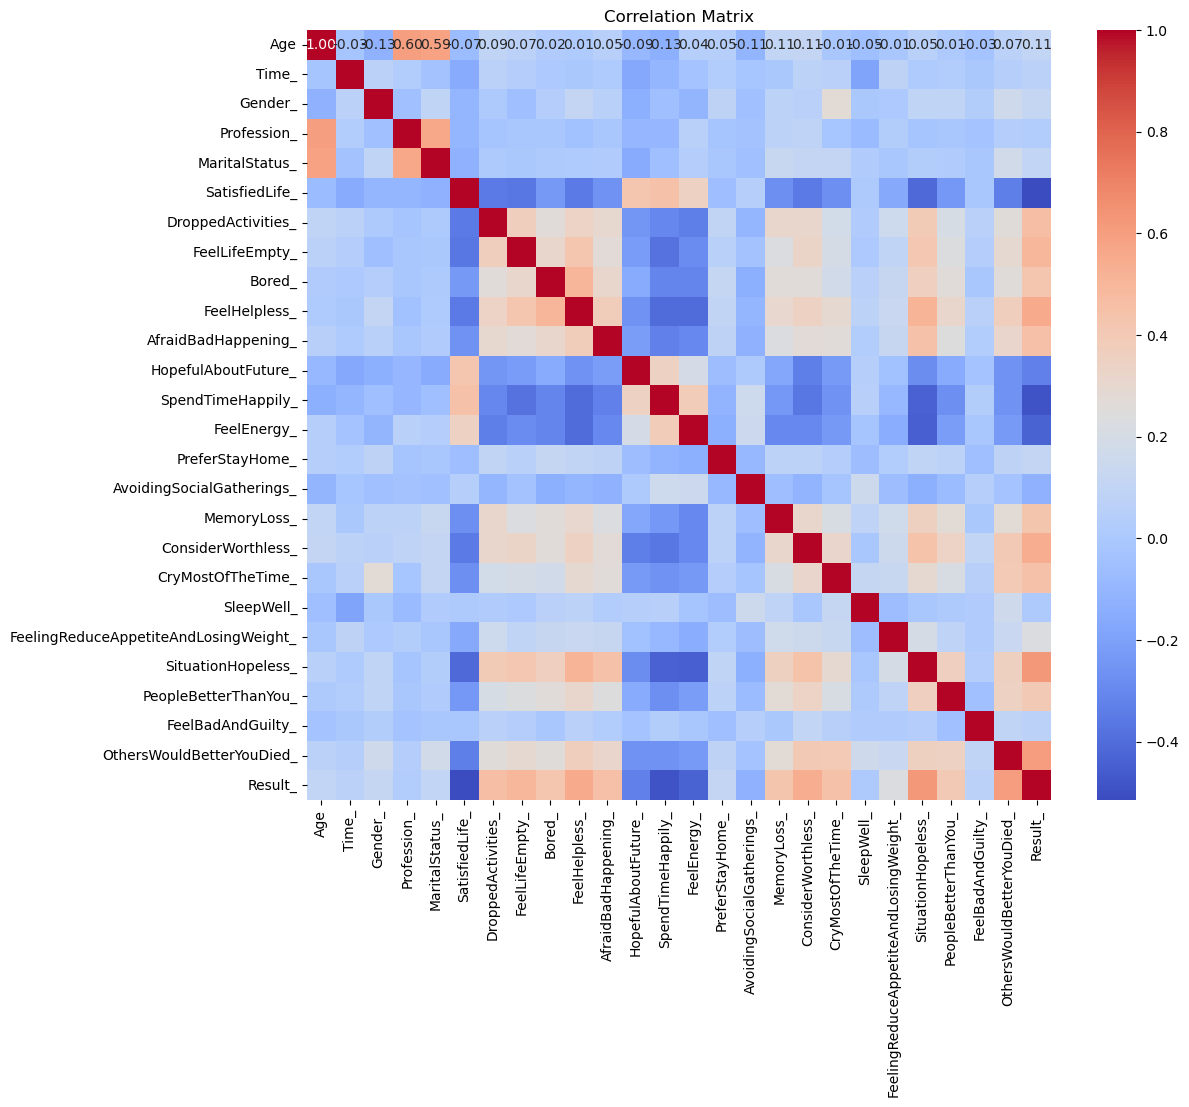

In [44]:
# ------------------------------------ Compute correlation matrix
    # """ 
    #   1 indicates a perfect positive correlation,
    #  -1 indicates a perfect negative correlation, and
    #   0 indicates no correlation.
    #   """

corr_matrix = df_numerical.corr()
corr_matrix.to_excel('correlation.xlsx', index=False)
print(round(corr_matrix,2))

# # You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.savefig('correlation_matrix.png')  # Save the figure as a PNG file

plt.show()

In [45]:
# --------------------------------------------------Group by 'Marital Status' and calculate the count of depressed individuals in each staus
count_by_age = df.groupby('MaritalStatus')['Result'].count()

# --------------------------------------------------Group by 'Marital Status' and calculate the sum of depressed individuals in each status
depressed = df[df['Result'] == 'Depressed'].groupby('MaritalStatus').size()
no_depressed = df[df['Result'] == 'NoDepressed'].groupby('MaritalStatus').size()
print("Number of people who are depressed in each age group:")
print(depressed, no_depressed)

Number of people who are depressed in each age group:
MaritalStatus
Divorced     11
Married     103
Single      288
dtype: int64 MaritalStatus
Divorced      7
Married     106
Single      450
dtype: int64


In [46]:

#------------------------------------------------- Group by 'Age' and calculate the count of depresssed individuals in each age
count_by_age = df.groupby('Age')['Result'].count()

#------------------------------------------------- Group by 'Age' and calculate the sum of depressed individuals in each age
depressed_by_age = df[df['Result'] == 'Depressed'].groupby('Age').size()

print("Number of people who are depressed in each age group:")
print(depressed_by_age)

Number of people who are depressed in each age group:
Age
13.0     1
14.0     3
15.0    16
16.0    10
17.0    15
18.0    20
19.0    14
20.0    14
21.0    39
22.0    62
23.0    87
23.5     1
24.0    25
25.0    13
26.0    10
27.0     4
28.0    11
29.0     9
30.0    11
31.0     5
32.0     6
33.0     4
35.0     5
36.0     1
39.0     1
40.0     5
41.0     2
43.0     1
46.0     1
48.0     1
49.0     1
50.0     3
55.0     1
dtype: int64


## Achievements
Positive correlations between columns: <br>
DroppedActivities and FeelLifeEmpty (0.37),  <br>
FeelLifeEmpty and Bored (0.31),  <br>
Bored and FeelHelpless (0.51), and so on. These could indicate related aspects or behaviors. <br><br>

Strong negative correlations between columns: <br>
SatisfiedLife and DroppedActivities (-0.35), <br>
SatisfiedLife and FeelLifeEmpty (-0.36), <br>
SatisfiedLife and FeelHelpless (-0.35), and so on. This suggests an inverse relationship between these variables.<br><br>

SituationHopeless has the strongest positive correlation with depression (0.62), Age, Profession and MaritalStatus respectively have the most strong correlation with depression.<br>
SatisfiedLife has the most Strong negative correlations with depression (-0.51),  SpendTimeHappy and FeelEnergy respectively have the lease correlation with depression.
